In [23]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [24]:
df = pd.read_csv("D:/House_Rent_Dataset.csv")
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [25]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [26]:
# Split the "Floor" column into "Current Floor" and "Total Floors"
   
df[['Current Floor', 'Total Floors']] = df['Floor'].str.split(' out of ', expand=True)
df.head(2)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Current Floor,Total Floors
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,Ground,2
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3


In [27]:
# Replace "Ground" with 0 in the "Current Floor" column

df['Current Floor'] = df['Current Floor'].replace({'Ground': 0})
df.head(2)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Current Floor,Total Floors
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3


In [28]:
#df = df.drop(columns = ["Posted On"])
#df = df.drop(columns = ["Floor"])

In [29]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()
df['Area_Type_encoded'] = encoder.fit_transform(df['Area Type'])


# Initialize LabelEncoder
encoder = LabelEncoder()
df['Area_Locality_encoded'] = encoder.fit_transform(df['Area Locality'])

# Initialize LabelEncoder
encoder = LabelEncoder()
df['City_encoded'] = encoder.fit_transform(df['City'])

# Initialize LabelEncoder
encoder = LabelEncoder()
df['Furnishing_Status_encoded'] = encoder.fit_transform(df['Furnishing Status'])

# Initialize LabelEncoder
encoder = LabelEncoder()
df['Tenant_Preferred_encoded'] = encoder.fit_transform(df['Tenant Preferred'])

# Initialize LabelEncoder
encoder = LabelEncoder()
df['Point_of_Contact_encoded'] = encoder.fit_transform(df['Point of Contact'])

df.head(2)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Current Floor,Total Floors,Area_Type_encoded,Area_Locality_encoded,City_encoded,Furnishing_Status_encoded,Tenant_Preferred_encoded,Point_of_Contact_encoded
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2,2,221,4,2,1,2
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,2,1527,4,1,1,2


In [30]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns
numeric_cols = df.select_dtypes(include=["number"])

numeric_cols.head(3)

,BHK,Rent,Size,Bathroom,Area_Type_encoded,Area_Locality_encoded,City_encoded,Furnishing_Status_encoded,Tenant_Preferred_encoded,Point_of_Contact_encoded
0,2,10000,1100,2,2,221,4,2,1,2
1,2,20000,800,1,2,1527,4,1,1,2
2,2,17000,1000,1,2,1760,4,1,1,2


In [31]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
standardized_values = scaler.fit_transform(numeric_cols)

# Convert back to DataFrame
df_standardized = pd.DataFrame(standardized_values, columns=numeric_cols.columns)

df_standardized.head(2)

,BHK,Rent,Size,Bathroom,Area_Type_encoded,Area_Locality_encoded,City_encoded,Furnishing_Status_encoded,Tenant_Preferred_encoded,Point_of_Contact_encoded
0,-0.100773,-0.320026,0.208960,0.038594,0.968881,-1.375251,0.863449,1.111575,0.145534,0.68966
1,-0.100773,-0.191982,-0.264125,-1.092067,0.968881,0.687519,0.863449,-0.349387,0.145534,0.68966


In [32]:
# Compute correlation matrix
correlation_matrix = df_standardized.corr()

# Display correlation values
correlation_matrix

,BHK,Rent,Size,Bathroom,Area_Type_encoded,Area_Locality_encoded,City_encoded,Furnishing_Status_encoded,Tenant_Preferred_encoded,Point_of_Contact_encoded
BHK,1.000000,0.369718,0.716145,0.794885,-0.153225,0.016211,0.046914,-0.140264,0.041534,-0.230954
Rent,0.369718,1.000000,0.413551,0.441215,-0.214867,-0.018849,0.210525,-0.146251,0.006027,-0.339677
Size,0.716145,0.413551,1.000000,0.740703,-0.079705,-0.006800,-0.049831,-0.172783,0.031500,-0.214327
Bathroom,0.794885,0.441215,0.740703,1.000000,-0.183012,0.010241,0.108257,-0.181425,0.056894,-0.327666
Area_Type_encoded,-0.153225,-0.214867,-0.079705,-0.183012,1.000000,-0.007743,-0.282856,0.056276,0.155388,0.559451
Area_Locality_encoded,0.016211,-0.018849,-0.006800,0.010241,-0.007743,1.000000,-0.042836,0.015144,-0.030848,0.000294
City_encoded,0.046914,0.210525,-0.049831,0.108257,-0.282856,-0.042836,1.000000,0.002633,0.041769,-0.357165
Furnishing_Status_encoded,-0.140264,-0.146251,-0.172783,-0.181425,0.056276,0.015144,0.002633,1.000000,-0.092878,0.131276
Tenant_Preferred_encoded,0.041534,0.006027,0.031500,0.056894,0.155388,-0.030848,0.041769,-0.092878,1.000000,0.063182
Point_of_Contact_encoded,-0.230954,-0.339677,-0.214327,-0.327666,0.559451,0.000294,-0.357165,0.131276,0.063182,1.000000


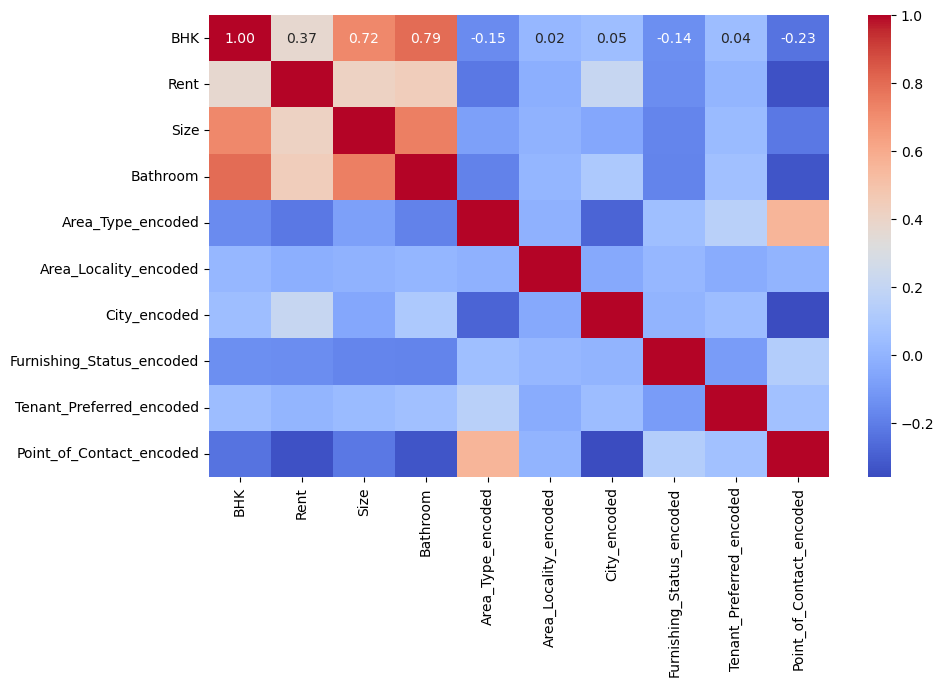

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10,6))

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Show plot
plt.show()

# Independent (x), Dependent (y) 

In [34]:
# independent variables
x = df_standardized[['BHK', 'Size', 'Bathroom', 'Point_of_Contact_encoded']]
y = df_standardized['Rent']  # Dependent variable

In [35]:
print(x.shape, y.shape)

(4746, 4) (4746,)


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Split dataset into training (80%) and testing (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)
x_train.head(2)

,BHK,Size,Bathroom,Point_of_Contact_encoded
3186,-0.100773,-0.342972,-1.092067,0.68966
1833,-1.302453,-0.264125,-1.092067,0.68966


In [37]:
print(x_train.shape, y_train.shape)  # Should match in row count

(3796, 4) (3796,)


In [38]:
# Train Linear Regression model

model = LinearRegression()
model = model.fit(x_train, y_train)

# Predict on test data
y_pred = model.predict(x_test)

# Convert predictions into DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=['Predicted_Rent'])
y_pred_df.head()

,Predicted_Rent
0,-0.094097
1,-0.200548
2,-0.106161
3,1.144097
4,-0.033677


In [39]:
dict = {
    "Size"                       : df_standardized["Size"],
    "Bathroom"                   : df_standardized["Bathroom"],
    "City_encoded"               : df_standardized["City_encoded"],
    "Furnishing_Status_encoded"  : df_standardized["Furnishing_Status_encoded"],
    "Tenant_Preferred_encoded"   : df_standardized["Tenant_Preferred_encoded"],
    "Point_of_Contact_encoded"   : df_standardized["Point_of_Contact_encoded"],
    "Rent"                       : df_standardized["Rent"],
    "Predicted_Rent"             : y_pred_df["Predicted_Rent"]
                            }
data = pd.DataFrame(dict)
data.head()

,Size,Bathroom,City_encoded,Furnishing_Status_encoded,Tenant_Preferred_encoded,Point_of_Contact_encoded,Rent,Predicted_Rent
0,0.208960,0.038594,0.863449,1.111575,0.145534,0.68966,-0.320026,-0.094097
1,-0.264125,-1.092067,0.863449,-0.349387,0.145534,0.68966,-0.191982,-0.200548
2,0.051265,-1.092067,0.863449,-0.349387,0.145534,0.68966,-0.230395,-0.106161
3,-0.264125,-1.092067,0.863449,1.111575,0.145534,0.68966,-0.320026,1.144097
4,-0.185277,-1.092067,0.863449,1.111575,-1.783809,0.68966,-0.352037,-0.033677


In [40]:
data["error"] = data["Rent"] - data["Predicted_Rent"]
data.head()

,Size,Bathroom,City_encoded,Furnishing_Status_encoded,Tenant_Preferred_encoded,Point_of_Contact_encoded,Rent,Predicted_Rent,error
0,0.208960,0.038594,0.863449,1.111575,0.145534,0.68966,-0.320026,-0.094097,-0.225929
1,-0.264125,-1.092067,0.863449,-0.349387,0.145534,0.68966,-0.191982,-0.200548,0.008566
2,0.051265,-1.092067,0.863449,-0.349387,0.145534,0.68966,-0.230395,-0.106161,-0.124234
3,-0.264125,-1.092067,0.863449,1.111575,0.145534,0.68966,-0.320026,1.144097,-1.464123
4,-0.185277,-1.092067,0.863449,1.111575,-1.783809,0.68966,-0.352037,-0.033677,-0.318360


In [41]:
# Shifting One row below from "error" to "error_x" column

data["error_x"] = data["error"].shift(+1)
data["DW"] = data["error"] - data["error_x"]
data["DW_2"] = data["DW"] * data["DW"]
data["error^2"] = data["error"] * data["error"]

data.head()

,Size,Bathroom,City_encoded,Furnishing_Status_encoded,Tenant_Preferred_encoded,Point_of_Contact_encoded,Rent,Predicted_Rent,error,error_x,DW,DW_2,error^2
0,0.208960,0.038594,0.863449,1.111575,0.145534,0.68966,-0.320026,-0.094097,-0.225929,NaN,NaN,NaN,0.051044
1,-0.264125,-1.092067,0.863449,-0.349387,0.145534,0.68966,-0.191982,-0.200548,0.008566,-0.225929,0.234495,0.054988,0.000073
2,0.051265,-1.092067,0.863449,-0.349387,0.145534,0.68966,-0.230395,-0.106161,-0.124234,0.008566,-0.132800,0.017636,0.015434
3,-0.264125,-1.092067,0.863449,1.111575,0.145534,0.68966,-0.320026,1.144097,-1.464123,-0.124234,-1.339889,1.795304,2.143657
4,-0.185277,-1.092067,0.863449,1.111575,-1.783809,0.68966,-0.352037,-0.033677,-0.318360,-1.464123,1.145763,1.312773,0.101353


In [42]:
numirator=data['DW_2'].sum()
denominator=data['error^2'].sum()

Dw_score = numirator/denominator
Dw_score

1.689531321056413

# ERE, The value of DW is (1.138.....) satisfied